# Commercial Products Marketing Analytics (Data Analysis Project)

## Introduction

This notebook will accomplish the following task:

1. Exploratory Data Analysis
2. Statistical Analysis
3. Data Visualization

#### Overall goal:
You're a Data Scientist and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the dataset to understand this problem and propose data-driven solutions.  

#### Section 01: Exploratory Data Analysis
* Are there any null values or outliers? How we will wrangle/handle them?
* Are there any variables that needs transformations?
* Are there any useful variables that we can utilize with the given data?
* Do you notice any patterns or anomalies in the data? Can we plot them?

#### Section 02: Statistical Analysis
Run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to the CMO. Make sure to interpret results with non-statistical jargon so that the CMO can understand our findings.  

* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your CMO insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?
* Is there a significant relationship between geographical regional and success of a campaign?

#### Section 03: Data Visualization
Plot and visualize the answers to the below questions:

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?

In [1]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

## Dataset

Before beginning the analysis, we will load and view the dataset, and perform data preparation.

#### View the dataset info:

In [2]:
# Read and load dataset

df = pd.read_csv('marketing_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


* Clean up column names
* Transform selected columns to numeric format:
    - `Income` to float

In [3]:
# Clean up column names that contains whitespace
df.columns = df.columns.str.replace(' ', '')

# Transform income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

#### The cleaned dataset:

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


# Section 01: Exploratory Data Analysis

### Are there any null values or outliers? How will you wrangle/handle them?

#### Null Values
* Identify features containing null values:

In [6]:
# Null values
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

* The feature `Income` contains 24 null values
* Plot this feature to identify best strategy for imputation
    - Findings: 
        - Most incomes are distributed between \\$0-\\$100,000, with a few outliers
        - Will impute null values with median value, to avoid effects of outliers on imputation value

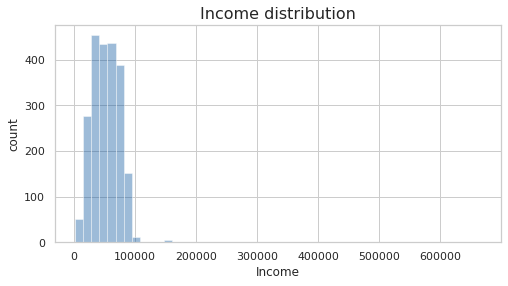

In [7]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

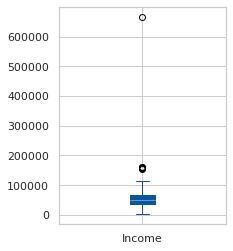

In [8]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

* Impute null values in `Income`, using median value (to avoid skewing of the mean due to outliers):

In [9]:
df['Income'] = df['Income'].fillna(df['Income'].median())

#### Outliers

* Identify features containing outliers:
    - Findings: Multiple features contain outliers (see boxplots below), but the only that likely indicate data entry errors are `Year_Birth <= 1900`

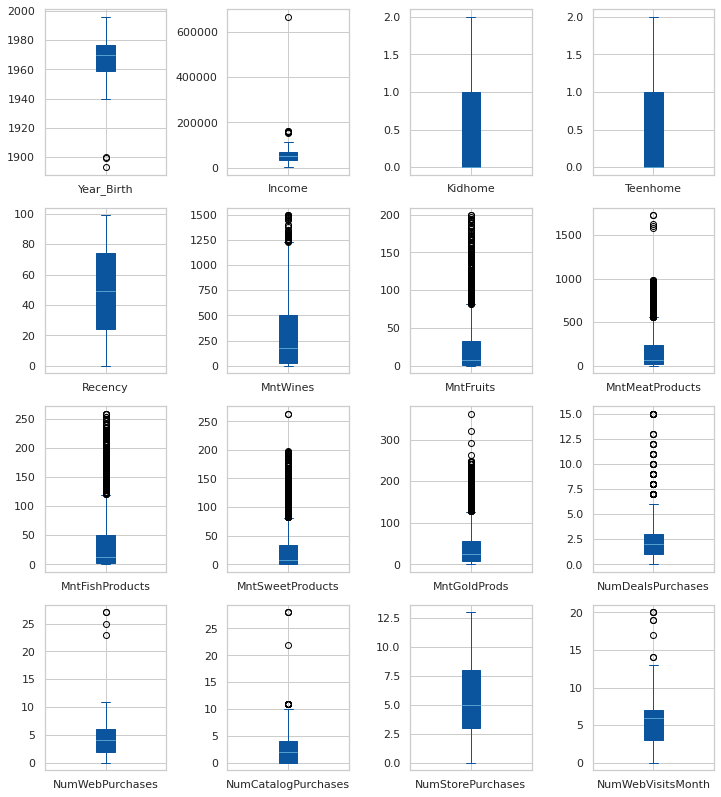

In [10]:
# Select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# Subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

* Remove rows where `Year_Birth <= 1900`:

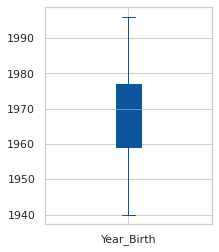

In [11]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True);

## Are there any variables that warrant transformations?

* View data types:
    - Findings: The `Dt_Customer` column should be transformed to datetime format

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

* Transform `Dt_Customer` to datetime:

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### Are there any useful variables that we can utilize with the given data?

* Review a list of the feature names below, from which we can engineer:
    - The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'.
    - The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'.
    - The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'.
    - The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'.
    - The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign).

In [14]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

* Perform feature engingeering as outlined in notes above:

In [16]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# view new features, by customer ID
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,2380,30,1
1,1,0,2014,1154,36,2
2,10476,1,2014,502,22,0
3,1386,2,2014,22,8,0
4,5371,1,2014,182,16,2


### Do you notice any patterns or anomalies in the data? Can you plot them?

* To identify patterns, we will first identify feature correlations. Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below.
* From this heatmap we can observe the following clusters of correlated features:
    - The **"High Income"** cluster:
        - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively correlated with 'Income'
        - Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'
    - The **"Have Kids & Teens"** cluster:
        - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are negatively correlated with 'Dependents' (with a stronger effect from kids *vs.* teens)
        - Purchasing deals ('NumDealsPurchases') is positively correlated with 'Dependents' (kids and/or teens) and negatively correlated with 'Income'
    - The **"Advertising Campaigns"** cluster:
        - Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
        - Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster
* Anomalies:
    - Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
    - Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that  suggesting that deals are an effective way of stimulating purchases on the website

#### Calculate correlation matrix

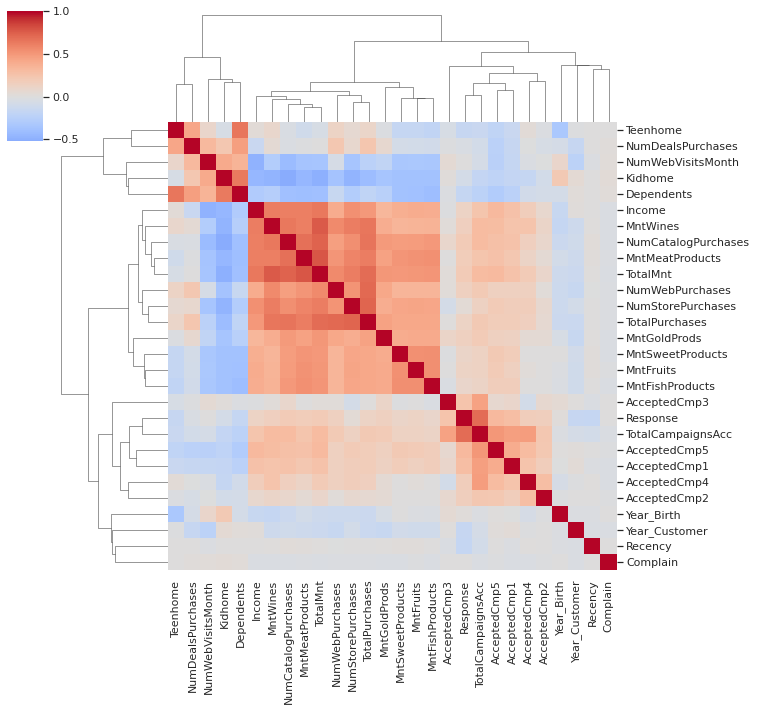

In [17]:
## Using non-parametric test of correlation (kendall), since some features are binary
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# Plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

* Plot illustrating the effect of high income on spending:

Note: For the purposes of this plot, limiting income to < 200000 to remove outlier

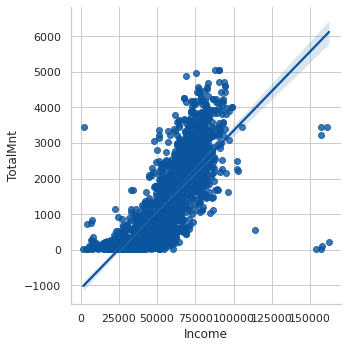

In [18]:
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000]);

* Plot illustrating negative effect of having dependents (kids & teens) on spending:

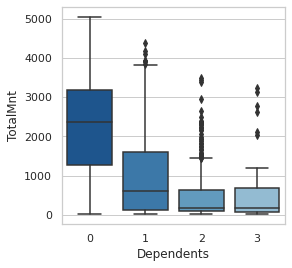

In [19]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df);

* Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

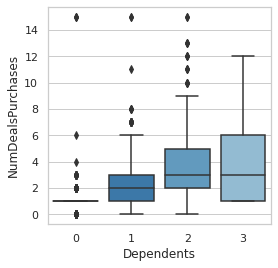

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

* Plots illustrating the positive effect of income and negative effect of having kids & teens on advertising campaign acceptance:

Note: For the purposes of the following plot, limiting income to < 200000 to remove outlier

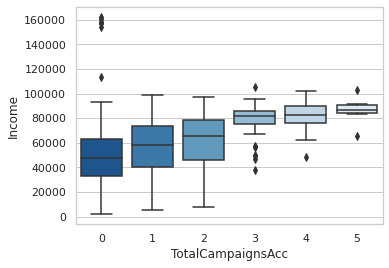

In [21]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000]);

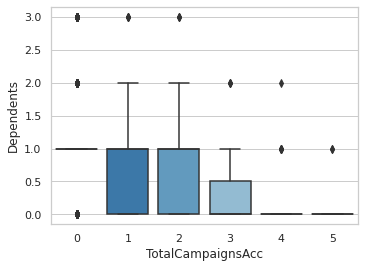

In [22]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=df);

* Investigate anomaly: 
    - Number of web visits in the last month is not positively correlated with number of web purchases
    - Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

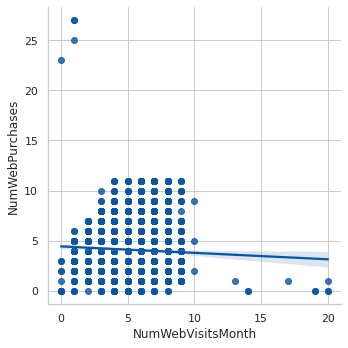

In [23]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

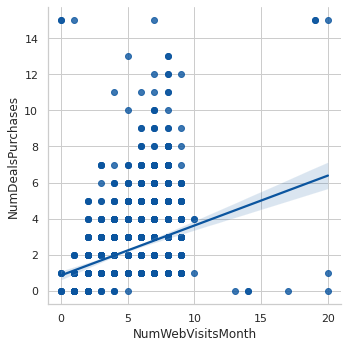

In [24]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);

# Section 02: Statistical Analysis

Run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings. 

### What factors are significantly related to the number of store purchases?  

* We will use use a linear regression model with `NumStorePurchases` as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
* Begin by plotting the target variable:

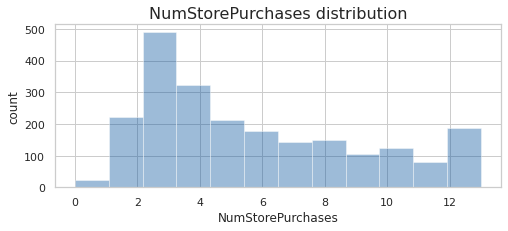

In [25]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

* Drop uninformative features
    - `ID` is unique to each customer
    - `Dt_Customer` will be dropped in favor of using engineered variable `Year_Customer`
* Perform one-hot encoding of categorical features, encoded data shown below:

In [26]:
# Drop unique ID
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [27]:
# One-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# Get categorical features and review number of unique values
cat = df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

# Use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# Merge with numeric data
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

Number of unique values per categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,2014,2380,30,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2014,1154,36,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,2014,502,22,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,2014,22,8,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2014,182,16,2


* Fit linear regression model to training data (70% of dataset)
* Evaluate predictions on test data (30% of dataset) using RMSE:
    - Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

# Evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  1.3486534141148176e-14
Median value of target variable:  5.0


* Identify features that significantly affect the number of store purchases, using permutation importance:
    - Significant features:
        - 'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'
        - All other features are not significant

In [30]:
# Install eli5

!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 11.8 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a788aa292b5cc73c46691eb12d527195b5f75851deff206181bb64e7c3718782
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [31]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

* Explore the directionality of these effects, using SHAP values:
    - Findings:
        - The number of store purchases increases with higher number of total purchases ('TotalPurchases')
        - The number of store purchases decreases with higher number of catalog, web, or deals purchases ('NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases')
    - Interpretation:
        - Customers who shop the most in stores are those who shop less via the catalog, website, or special deals

In [34]:
# Install shap

!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.3 MB/s eta 0:00:00


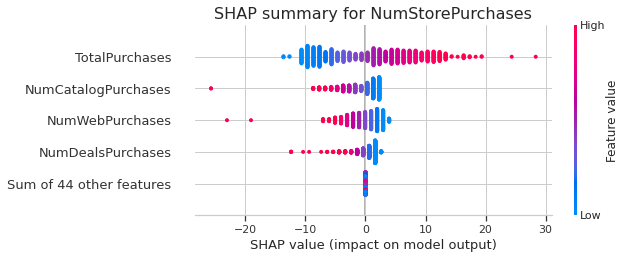

In [36]:
import shap

# Calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# Plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

### Does US fare significantly better than the rest of the world in terms of total purchases?

* Plot total number of purchases by country:
    - Findings: 
        - Spain (SP) has the highest number of purchases
        - US is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

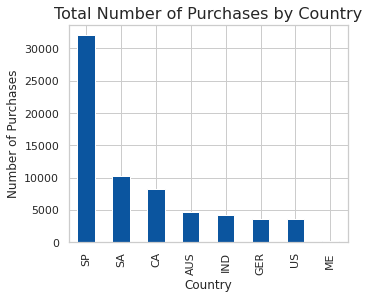

In [37]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

* Plot total amount spent by country: 
    - Findings: 
        - Spain (SP) has the highest total amount spent on purchases.
        - US is second to last, therefore the US does not fare better than the rest of the world in terms of the total amount spent on purchases.

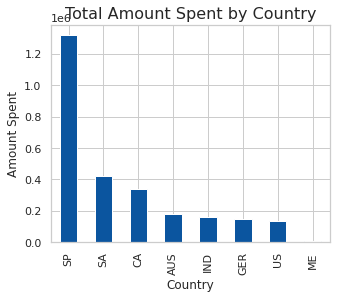

In [38]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

### Your CMO insists that people who buy gold are more conservative. Therefore, people who spent an above-average amount on gold in the last 2 years would have more in-store purchases. Justify or refute this statement using an appropriate statistical test.

* Plot relationship between amount spent on gold in the last 2 years (`MntGoldProds`) and number of in store purchases (`NumStorePurchases`):
    - Findings: There is a positive relationship, but is it statistically significant?

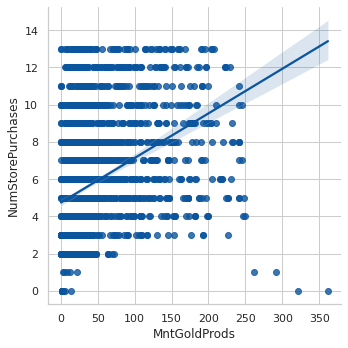

In [39]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df);

* Perform Kendall correlation analysis (non-parametric test since `MntGoldProducts` is not normally distributed and contains outliers):
    - Findings: There is significant positive correlation between `MntGoldProds` and `NumStorePurchases`

In [40]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

* We will compare `MntFishProducts` between Married PhD candidates and all other customers:
    - Findings: Married PhD candidates spend significantly less on fish products compared to other customers.

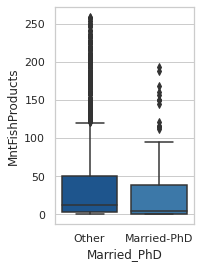

In [42]:
# Get the sum of the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

# Plot MntFishProducts between Married-PhD and others
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2);

In [44]:
# Independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'], df2[df2['Married_PhD'] == 'Other']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval, 3))

t-test p-value:  0.005


In [45]:
# Drop the married-phD column created above, to include only the original variables in the analysis below
df2.drop(columns='Married_PhD', inplace=True)

### What other factors are significantly related to amount spent on fish?

* Like with the analysis of `NumStorePurchases` above, we will use use a linear regression model with `MntFishProducts` as the target variable, and then use machine learning explainability techniques to get insights about which features predict the amount spent on fish
* Begin by plotting the target variable:

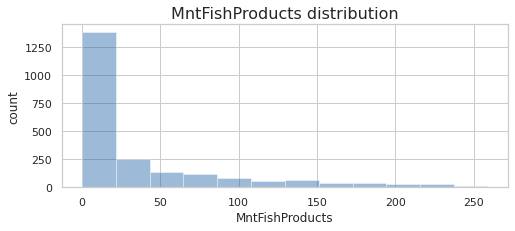

In [46]:
plt.figure(figsize=(8,3))
sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

* Fit linear regression model to training data (70% of dataset)
* Evaluate predictions on test data (30% of dataset) using RMSE:
    - Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

In [47]:
# Isolate X and y variables, and perform train-test split
X = df2.drop(columns='MntFishProducts')
y = df2['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

# Evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  2.405425471463702e-13
Median value of target variable:  12.0


* Identify features that significantly affect the amount spent on fish, using permutation importance:
    - Significant features:
        - 'TotalMnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits'
        - All other features are not significant

In [48]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

* Explore the directionality of these effects, using SHAP values:
    - Findings:
        - The amount spent on fish increases with higher total amount spent ('TotalMnt')
        - The amount spent on fish decreases with higher amounts spent on wine, meat, gold, fruit, or sweets ('MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits')
    - Interpretation:
        - Customers who spend the most on fish are those who spend less on other products (wine, meat, gold, fruit, and sweets)

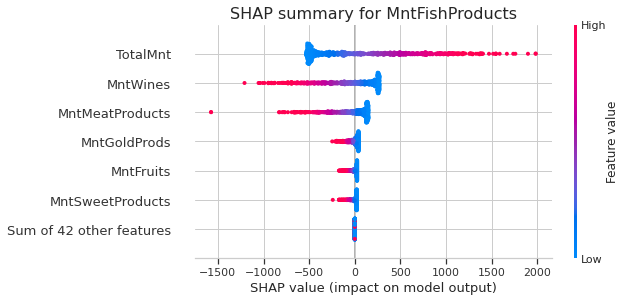

In [49]:
# Calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# Plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

### Is there a significant relationship between geographical regional and success of a campaign?

* Plot success of campaigns by region:
    - Findings:
        - The campaign acceptance rates are low overall.
        - The campaign with the highest overall acceptance rate is the most recent campaign (column name: `Response`).
        - The country with the highest acceptance rate in any campaign is Mexico.
    - Is the effect of region on campaign success statistically significant? See below.

#### Convert country codes to correct nomenclature for choropleth plot
#### The dataset doesn't provide information about country codes

In [50]:
## I'm taking my best guess about the largest nations that make sense given the codes provided
df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# Success of campaigns by country code
df_cam = df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# Rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

* Statistical summary of regional effects on campaign success:
    - Methodology: Performed logistic regression for Campaign Accepted by Country, reporting Chisq p-value for overall model.
    - Findings: The regional differences in advertising campaign success are statistically significant.

In [51]:
# Calculate logistic regression p-values for campaign acceptance ~ country using generalized linear model
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

## Get the data of interest for GLM
df_cam_wide = df[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

## Store statistics results
stat_results = []

## Perform GLM
for col in df_cam_wide.drop(columns='Country').columns:
    this_data = df_cam_wide[['Country', col]]
    
    # Define formula
    formula = col+'~Country'
    
    # Logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
    # Get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) # Df Model = 7 degrees of freedom when you run result.summary()
     
    # Append to stat_results
    stat_results.append(pval)
    
    # Print stat summary for entire model
    print(result.summary())
    
## Check results
print("\nChisq p-values: ", stat_results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Wed, 25 Jan 2023   Deviance:                       1065.0
Time:                        00:04:38   Pearson chi2:                 2.23e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

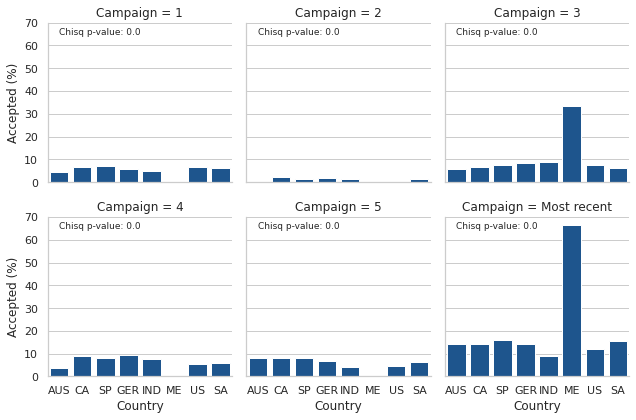

In [53]:
## Merge in the original country codes provided in the dataset
countries = df[['Country', 'Country_code']].drop_duplicates().reset_index(drop=True)
df_cam2 = df_cam.merge(countries, how='left', on='Country_code')
df_cam2.head()

## Bar graphs
g = sns.FacetGrid(df_cam2, col='Campaign', col_wrap=3)
g.map(sns.barplot, 'Country', 'Accepted (%)')

for ax, pval in zip(g.axes.flat, stat_results):
    ax.text(0, 65, "Chisq p-value: "+str(pval), fontsize=9) #add text;

# Section 03: Data Visualization

Plot and visualize the answers to the below questions.

### Which marketing campaign is most successful?

* Plot marketing campaign overall acceptance rates:
    - Findings: The most successful campaign is the most recent (column name: `Response`).

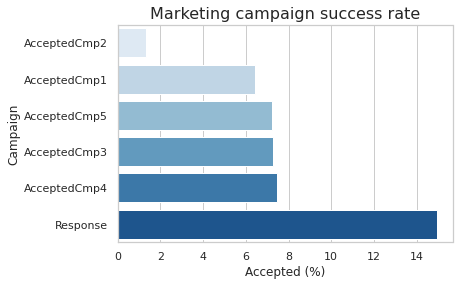

In [55]:
# Calculate success rate (percent accepted)
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# Plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

### What does the average customer look like for this company?

* Basic demographics: The average customer is:
    - Born in 1969
    - Became a customer in 2013
    - Has an income of roughly \$52,000 per year
    - Has 1 dependent (roughly equally split between kids or teens)
    - Made a purchase from our company in the last 49 days

In [56]:
# List of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# List of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# List of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [57]:
# Average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


### Which products are performing best?

* The average customer spent:
    - \$25-50 on Fruits, Sweets, Fish, or Gold products
    - Over \$160 on Meat products
    - Over \$300 on Wines
    - Over \$600 total
* Products performing best:
    - Wines
    - Followed by meats

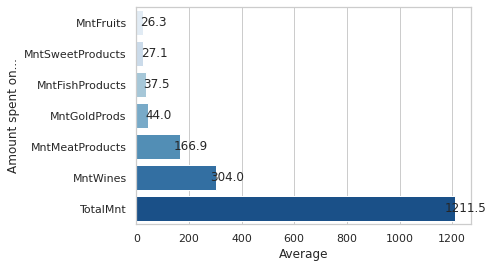

In [58]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# Plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## Add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

### Which channels are underperforming?

* Channels: The average customer is
    - Accepted less than 1 advertising campaign
    - Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
    - Averaged 14 total purchases
    - Visited the website 5 times
* Underperforming channels:
    - Advertising campaigns
    - Followed by deals, and catalog

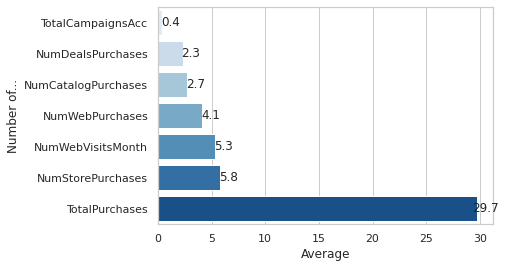

In [59]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# Plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## Add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

# Conclusion


**Recall the overall goal:**  
You're a Data Scientist and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

**Summary of actionable findings to improve advertising campaign success:**  
* The most successful advertising campaign was the most recent campaign (column name: `Response`), and was particularly successful in Mexico (>60% acceptance rate)
    - Recommendation: Conduct future advertising campaigns using the same model recently implemented in Mexico. 
* Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens
    - Recommendation: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens
* The most successful products are wines and meats (*i.e.* the average customer spent the most on these items)
    - Recommendation: Focus advertising campaigns on boosting sales of the less popular items
* The underperforming channels are deals and catalog purchases (*i.e.* the average customer made the fewest purchases via these channels)
* The best performing channels are web and store purchases (*i.e.* the average customer made the most purchases via these channels)
    - Recommendation: Focus advertising campaigns on more successful channels, to reach more customers